In [12]:
import numpy as np
import pylab
import healpy as hp
import matplotlib.pyplot as py

In [13]:
def D_ell(C_ell):
    # Determine the length of the input power spectrum
    n_ell = len(C_ell)

    # Create an array of zeros to store the scale invariant power spectrum
    D_ell = np.zeros(n_ell)

    # Compute the scale invariant power spectrum using vectorized operations
    # Vectorized operations eliminate the need for a for loop, improving performance

    # Compute the product of each element with the next element using np.arange(n_ell) * (np.arange(n_ell) + 1)
    # Multiply the above result by C_ell to perform element-wise multiplication with the corresponding elements in C_ell
    # Divide the above result by np.pi to perform element-wise division by pi
    D_ell = np.arange(n_ell) * (np.arange(n_ell) + 1) * C_ell / np.pi

    # Return the computed scale invariant power spectrum
    return D_ell

In [14]:
amin2rad = np.pi/(60.*180.)

# Simulating Sky

In [15]:
NSIDE = 512
NSIDE_decon = 128
lmax = 2*NSIDE
lmax_decon = 2*NSIDE_decon


In [16]:
cl_CMB_th = hp.read_cl("/home/julientang2001/Stage3A/Cls_Planck2018_lensed_scalar.fits")

cl_CMB_crop_th = cl_CMB_th[:,:lmax+1]

# np.random.seed(0)
map_CMB = hp.synfast(cl_CMB_th,nside=NSIDE,new = True)


print(map_CMB.shape)
cl_CMB6 = hp.anafast(map_CMB,lmax=lmax,alm = False)
cl_CMB = cl_CMB6[:4]
print(cl_CMB.shape)

(3, 3145728)
(4, 1025)


In [17]:
alm_CMB = hp.map2alm(map_CMB,lmax)


## Compare alm2map with nside_out and ud_grade

In [18]:
for i in range(alm_CMB.shape[0]):
    hp.almxfl(alm_CMB[i], hp.gauss_beam(hp.nside2resol(64)), inplace=True)

In [19]:
map_CMB_dg1 = hp.alm2map(alm_CMB,nside=NSIDE_decon)
map_CMB_alm_dg = hp.map2alm(map_CMB_dg1,lmax=lmax_decon)
map_CMB_alm_dg = np.array([hp.almxfl(alm_dg,1/hp.gauss_beam(hp.nside2resol(64)), inplace=True) for alm_dg in map_CMB_alm_dg])
map_CMB_dg1 = hp.alm2map(map_CMB_alm_dg,nside=NSIDE_decon)

In [20]:

map_CMB_dg2 = hp.ud_grade(map_CMB,nside_out=NSIDE_decon)
l_arr = np.arange(lmax_decon+1)
Cl_CMB1 = hp.anafast(map_CMB_dg1,lmax=lmax_decon)
Cl_CMB2 = hp.anafast(map_CMB_dg2,lmax=lmax_decon)
Cl_CMB3 = hp.anafast(map_CMB,lmax=lmax)

In [21]:
print(cl_CMB_crop_th.shape)

(4, 1025)


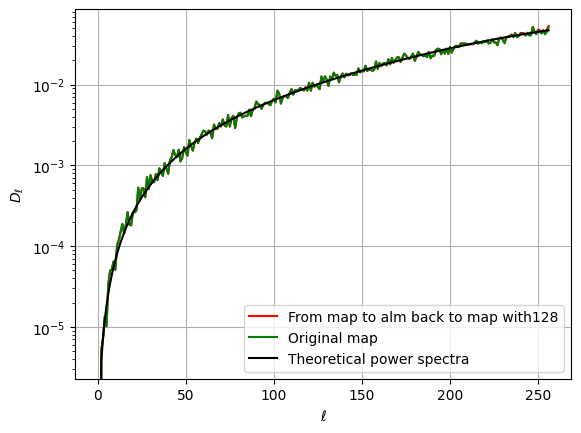

In [22]:

# py.plot(l_arr,D_ell(Cl_CMB1[2])/ hp.gauss_beam(hp.nside2resol(64))[:lmax_decon+1]**2,'r',label = 'From map to alm back to map with'+str(NSIDE_decon))
# py.plot(l_arr,D_ell(Cl_CMB1[2])/ hp.gauss_beam(hp.nside2resol(64))[2:lmax_decon+3]**2,'m',label = 'From map to alm back to map with'+str(NSIDE_decon))
py.plot(l_arr,D_ell(Cl_CMB1[2]),'r',label = 'From map to alm back to map with'+str(NSIDE_decon))
# py.plot(l_arr,D_ell(Cl_CMB2[2]),'b',label = 'Original map degraded to Nside_out')
# py.plot(l_arr,hp.anafast(map_CMB,lmax=lmax_decon)[2],'g')
py.plot(l_arr,D_ell(Cl_CMB3[2,:lmax_decon+1]),'g',label = 'Original map')
py.plot(l_arr,D_ell(cl_CMB_crop_th[2,:lmax_decon+1]),'k',label = 'Theoretical power spectra')
# py.plot(l_arr,Cl_CMB1[2]/cl_CMB_crop_th[2,:lmax_decon+1],'m--',label = r'$\frac{red}{green}$')
# py.axvline(NSIDE_decon,linestyle = '--')
py.grid()
py.xlabel(r'$\ell$')
py.ylabel(r'$D_{\ell}$')
py.legend(loc='best')
py.yscale('log')